# Bibliotecas

In [ ]:
import warnings
import datetime

import numpy        as np
import pandas       as pd

from IPython.display    import Image

warnings.filterwarnings( 'ignore' )

# Importação de dados

In [2]:
df_01 = pd.read_pickle('../exports/cicle_exports/01_description/df_01.pkl', compression="gzip")

In [3]:
df_02 = df_01.copy()

# 2.0 Feature engineering

## 2.1. Mindmap

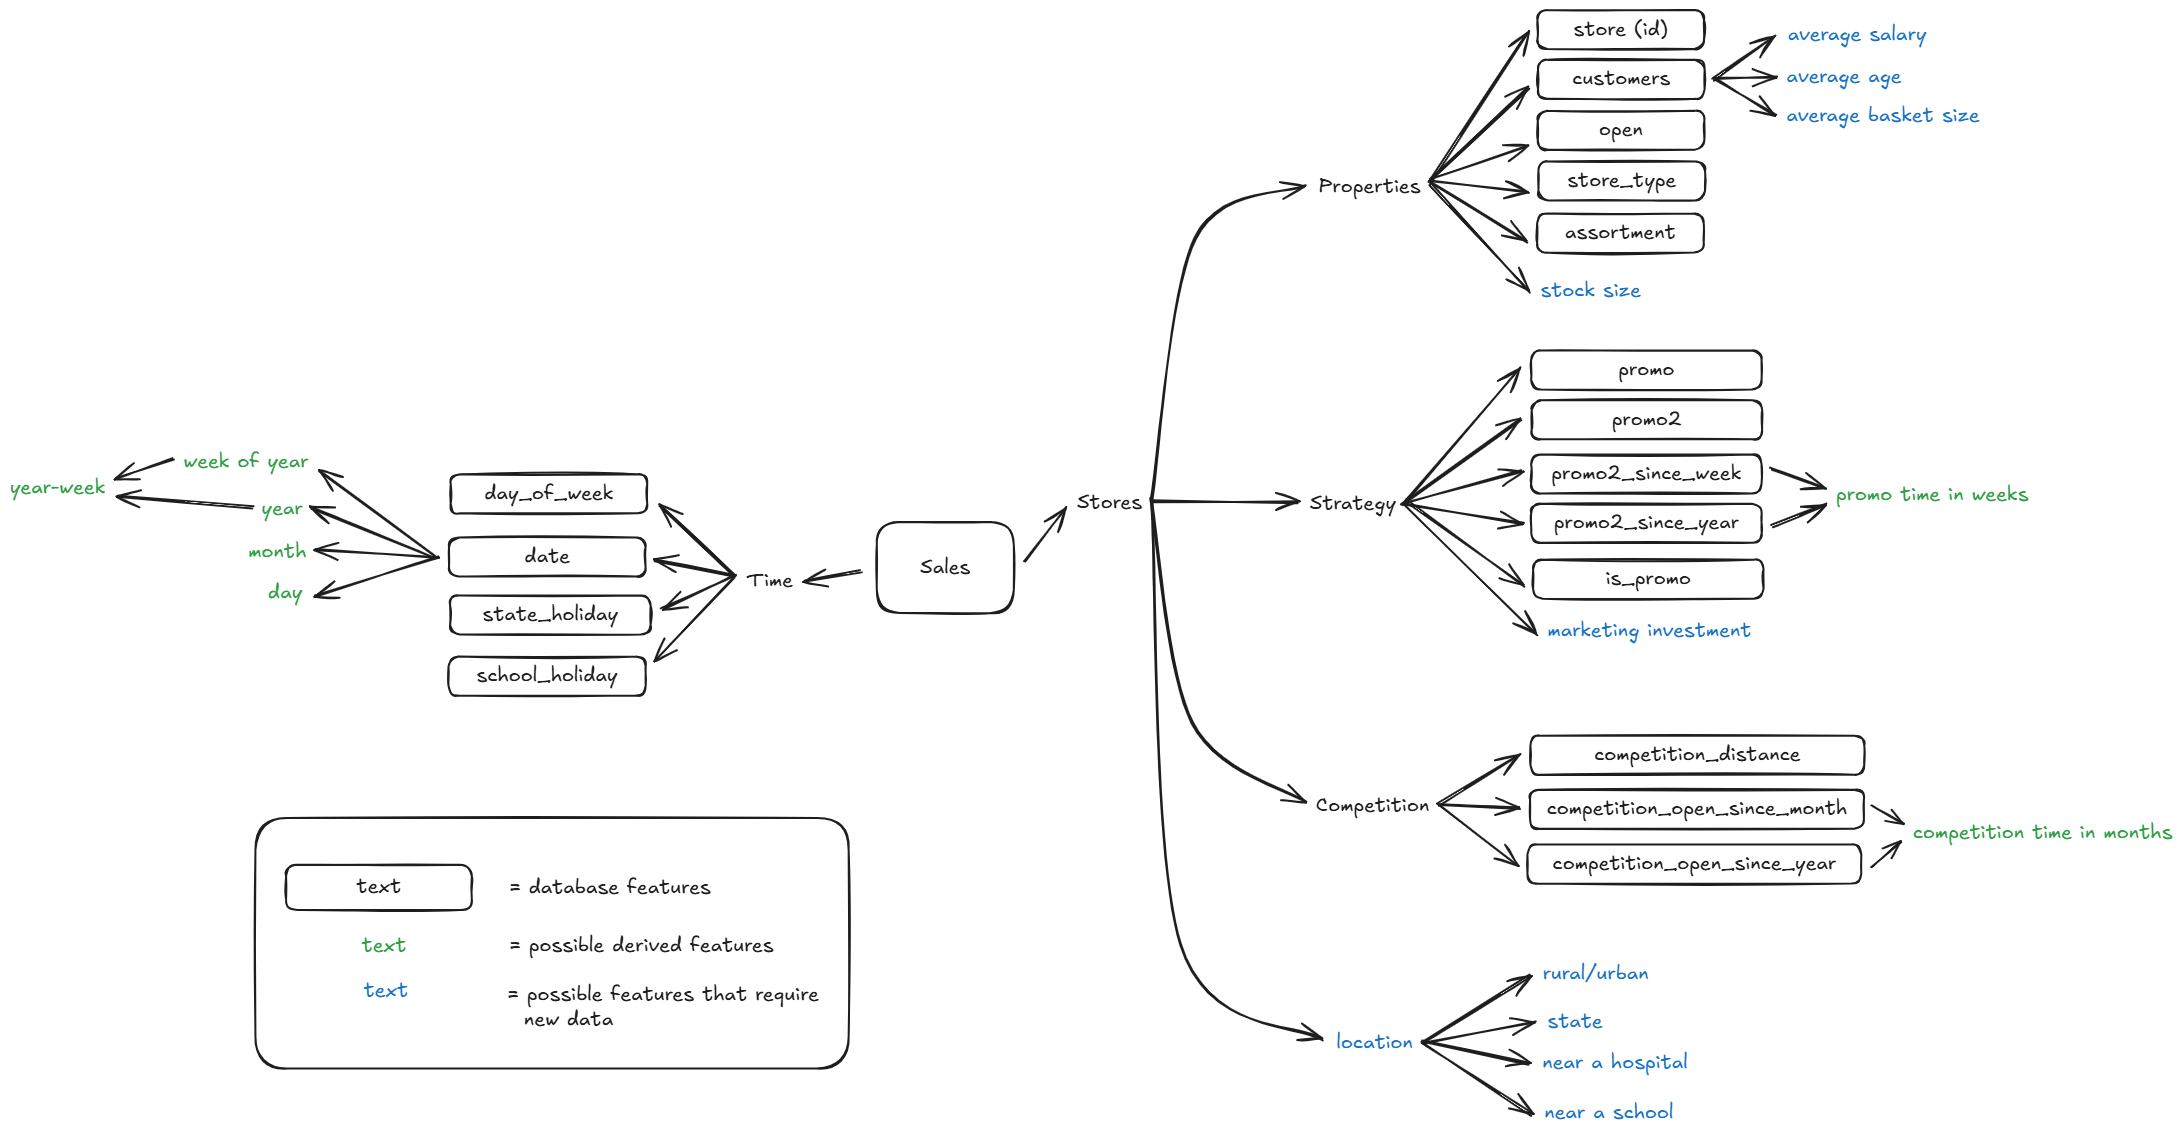

In [4]:
Image( '../img/mindmap.png' )

Neste mapa mental, foram mapeadas as variáveis presentes no dataset e levantadas possíveis variáveis derivadas e outras que seriam interessantes para um levantamento de dados posterior.

**Descrição das possíveis variáveis derivadas:**

- **promo_time_week**: Tempo de promoção convertido para semanas.
- **competition_time_month**: Tempo de existência da concorrência em meses.
- **day**: Desmembramento da parcela de dia da data.
- **month**: Desmembramento da parcela de mês da data.
- **year**: Desmembramento da parcela de ano da data.
- **week_of_year**: Transformação da data em número da semana do ano.
- **year_week**: Par ano-semana correspondente a data.

**Descrição das ideias de novas variáveis para serem levantadas:**

- **average_salary**: Renda média dos clientes que frequentam a loja.
- **average_age**: Idade média dos clientes que frequentam a loja.
- **average_basket_size**: Volume médio (financeiro) por compra dos clientes que frequentam a loja.
- **stock_size**: Volume médio (financeiro) dos estoques da loja.
- **marketing_investment**: Volume médio (financeiro) gasto em marketing por loja.
- **rural_urban**: Localização da loja categorizada entre local urbano ou rural.
- **state**: Localização da loja categorizada por província.
- **near_hospital**: Localização da loja categorizada por proximidade a um hospital.
- **near_school**: Localização da loja categorizada por proximidade a uma escola.

## 2.2. Criação de hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais promoções consecutivas deveriam vender mais.

**6.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**7.** Lojas deveriam vender mais ao longo dos anos.

**8.** Lojas deveriam vender mais no segundo semestre do ano.

**9.** Lojas deveriam vender menos aos finais de semana.

**10.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3. Criando variáveis derivadas

In [5]:
# year - Nova coluna apenas com o ano da coluna 'date'
df_02['year'] = df_02['date'].dt.year
df_02['year'] = np.int64(df_02['year'])

# month - Nova coluna apenas com o mês da coluna 'date'
df_02['month'] = df_02['date'].dt.month
df_02['month'] = np.int64(df_02['month'])

# day - Nova coluna apenas com o dia da coluna 'date'
df_02['day'] = df_02['date'].dt.day
df_02['day'] = np.int64(df_02['day'])

# week of year - Nova coluna apenas com a semana do ano da coluna 'date'
df_02['week_of_year'] = df_02['date'].dt.strftime('%W')
df_02['week_of_year'] = df_02['week_of_year'].astype( int )

# year week - Nova coluna apenas com semana do ano e o ano da coluna 'date'
df_02['year_week'] = df_02['date'].dt.strftime( '%Y-%W' )

# competition since - Converte 'competition_open_since_year' e 'competition_open_since_month' em uma variável com o tempo de existência do concorrente em meses. 
df_02['competition_since'] = df_02.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 )
df_02['competition_time_month'] = ( ( df_02['date'] - df_02['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

# promo since - Converte 'promo2_since_year' e 'promo2_since_week' em uma variável com o tempo de promoção em semanas. 
df_02['promo_since'] = df_02['promo2_since_year'].astype( str ) + '-' + df_02['promo2_since_week'].astype( str )
df_02['promo_since'] = df_02['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df_02['promo_time_week'] = ( ( df_02['date'] - df_02['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

# assortment
df_02['assortment'] = df_02['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

# state holiday
df_02['state_holiday'] = df_02['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )

In [6]:
# Conferindo tipos de variável:
print(df_02.dtypes)

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
year                                     int64
month        

In [7]:
df_02.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,30,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,30,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,30,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,30,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,30,2015-30,2015-04-01,4,2015-07-27,0


# Exportação de resultados

In [8]:
df_02.to_pickle('../exports/cicle_exports/02_feature_eng/df_02.pkl', compression='gzip')